In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Bloco 1 - K-Means tradicional com distância Euclidiana
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
# Bloco 2 - K-Means com distância DTW (tslearn)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
# Bloco 3 - Hierarchical Clustering com DTW
from scipy.cluster.hierarchy import linkage, fcluster
from tslearn.metrics import cdist_dtw
# Bloco 4 - DBA-KMeans (K-Means com DTW Barycenter Averaging)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import seaborn as sns

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tslearn.metrics import dtw

In [7]:
df = pd.read_csv('Metricas.csv')

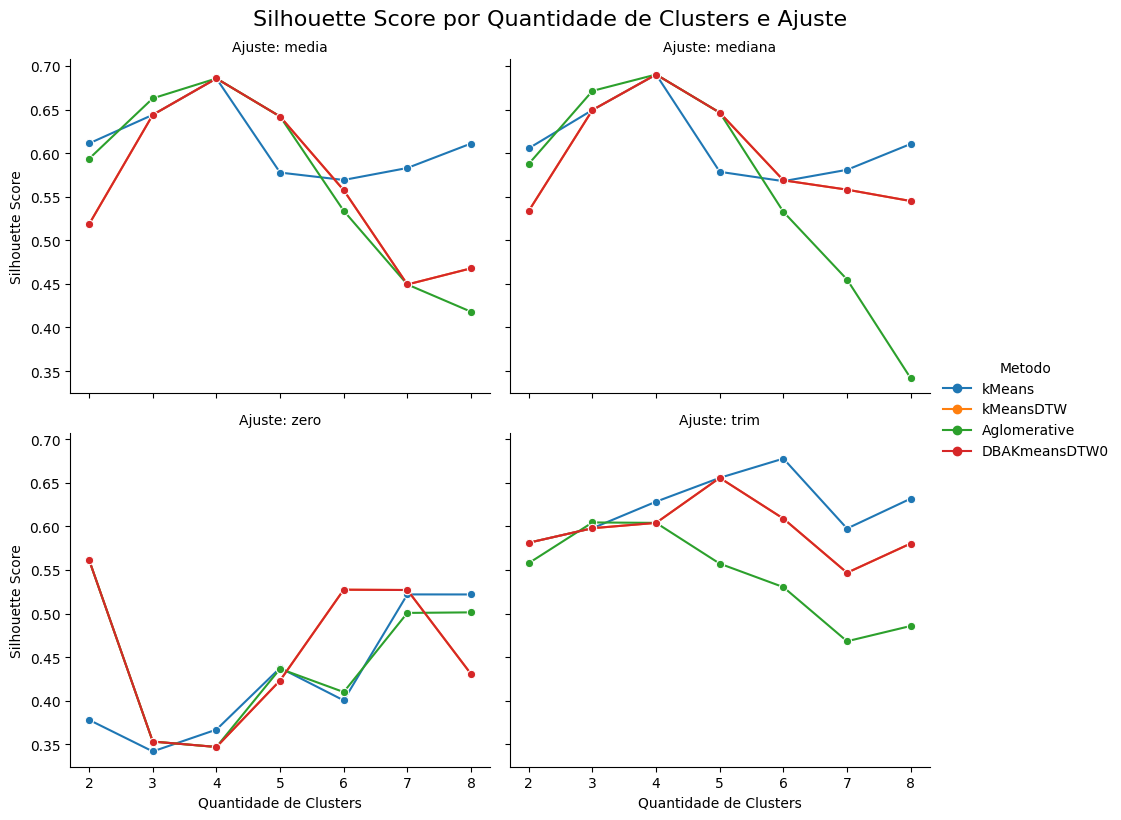

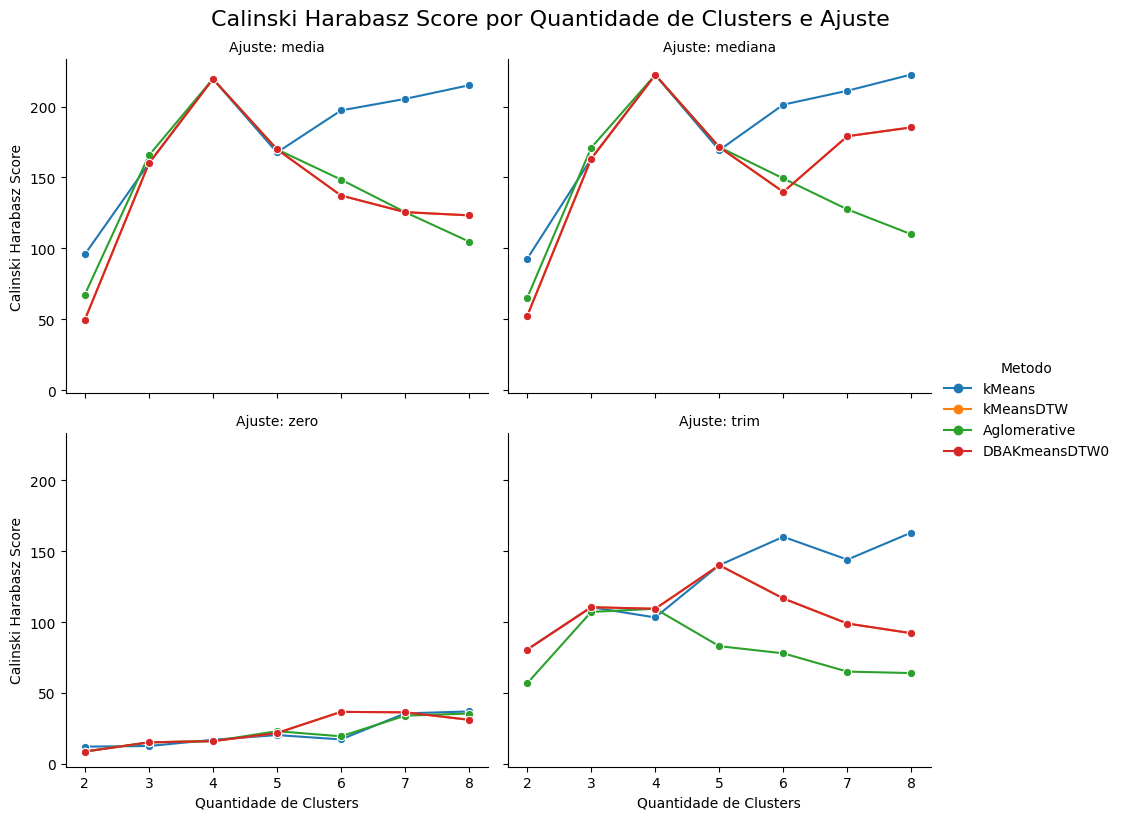

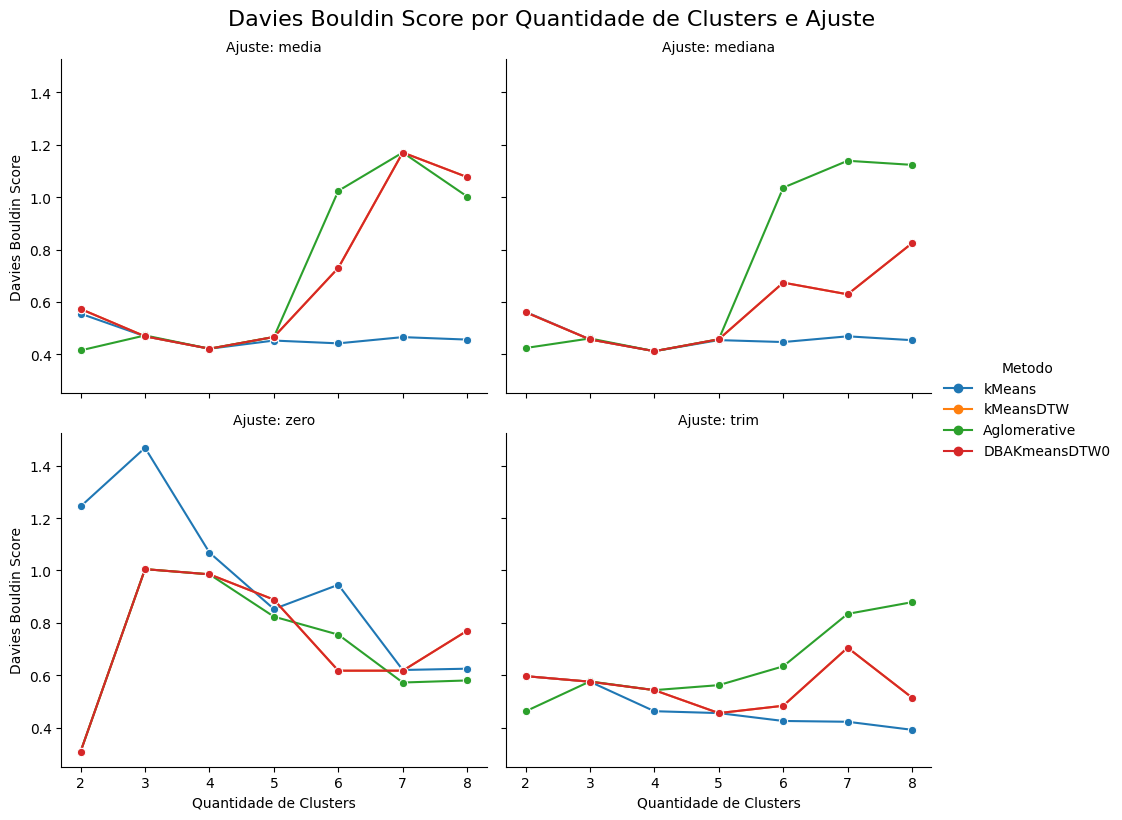

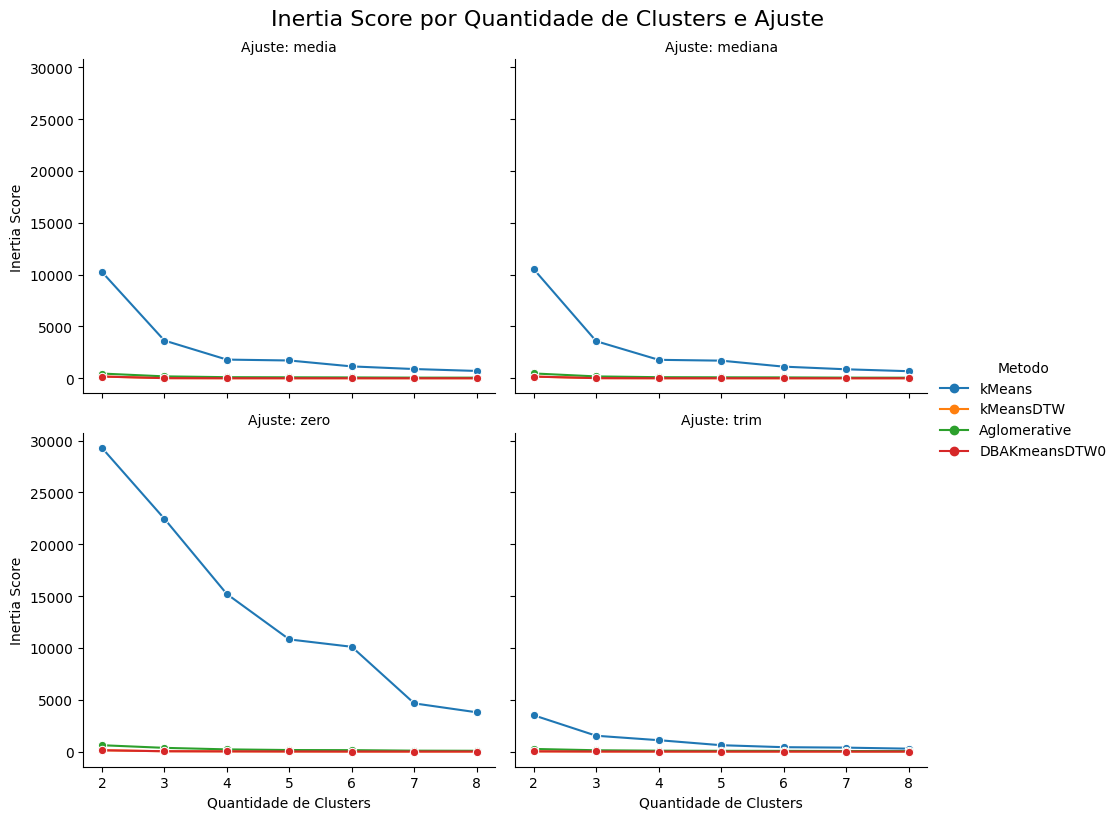

In [ ]:
# Definir as métricas para plotar
metrics = ['Silhouette_Score', 'Calinski_Harabasz_Score', 'Davies_Bouldin_Score', 'Inertia_Score']

# Iterar sobre cada métrica para criar os gráficos
for metric in metrics:
    # Usar seaborn.relplot para criar um grid de plots
    # 'col='Ajuste'' cria uma coluna separada para cada valor único de 'Ajuste'
    # 'hue='Metodo'' cria linhas coloridas diferentes para cada método de clusterização
    # 'kind='line'' especifica que é um gráfico de linha
    # 'marker='o'' adiciona marcadores aos pontos
    # 'height' e 'aspect' controlam o tamanho de cada subplot
    # 'col_wrap=2' organiza os subplots em 2 colunas por linha
    g = sns.relplot(data=df,
                    x='Quantidade_Clusters',
                    y=metric,
                    col='Ajuste',
                    hue='Metodo',
                    kind='line',
                    marker='o',
                    height=4,
                    aspect=1.2,
                    col_wrap=2)
    
    # Definir os rótulos dos eixos para cada subplot
    g.set_axis_labels("Quantidade de Clusters", metric.replace('_', ' ')) # Melhora o nome do eixo Y
    
    # Definir os títulos das colunas (que são os nomes dos ajustes)
    g.set_titles("Ajuste: {col_name}")
    
    # Adicionar um título principal para o conjunto de gráficos
    g.fig.suptitle(f'{metric.replace("_", " ")} por Quantidade de Clusters e Ajuste', y=1.02, fontsize=16) 
    
    # Mostrar o gráfico
    plt.show()  